In [1]:
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import rdMolTransforms as rmt
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
import datamol as dm

from src.data.datasets import *
from rdkit.Chem import rdMolTransforms as rmt
from rdkit.Chem import rdMolDescriptors

/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cch57/micromamba/envs/poses/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
# load datasets

MY_DATA_DIR = "path/to/data"

crossdocked_generated = DockedMolsDataset("crossdocked_test", docked=False)
crossdocked_docked = DockedMolsDataset("crossdocked_test", docked=True)

diffsbdd_generated = DiffSBDDSamples(docked=False)
diffsbdd_docked = DiffSBDDSamples(docked=True)

targetdiff_generated = DockedMolsDataset("targetdiff", docked=False)
targetdiff_docked = DockedMolsDataset("targetdiff", docked=True)

p2m_generated = DockedMolsDataset("pocket2mol", docked=False)
p2m_docked = DockedMolsDataset("pocket2mol", docked=True)

sbdd_generated = DockedMolsDataset("ar", docked=False)
sbdd_docked = DockedMolsDataset("ar", docked=True)

cvae_generated = DockedMolsDataset("cvae", docked=False)
cvae_docked = DockedMolsDataset("cvae", docked=True)


In [3]:
flag_generated = RedockedData("flag", "score_only")
flag_docked = RedockedData("flag", "redocked")

decompdiff_generated = RedockedData("decompdiff", "score_only")
decompdiff_docked = RedockedData("decompdiff", "redocked")

In [4]:
crossdocked_generated_clashes = crossdocked_generated.all_clashes
crossdocked_docked_clashes = crossdocked_docked.all_clashes

diffsbdd_generated_clashes = diffsbdd_generated.all_clashes
diffsbdd_docked_clashes = diffsbdd_docked.all_clashes

targetdiff_generated_clashes = targetdiff_generated.all_clashes
targetdiff_docked_clashes = targetdiff_docked.all_clashes

p2m_generated_clashes = p2m_generated.all_clashes
p2m_docked_clashes = p2m_docked.all_clashes

sbdd_generated_clashes = sbdd_generated.all_clashes
sbdd_docked_clashes = sbdd_docked.all_clashes

cvae_generated_clashes = cvae_generated.all_clashes
cvae_docked_clashes = cvae_docked.all_clashes

flag_generated_clashes = flag_generated.all_clashes
flag_docked_clashes = flag_docked.all_clashes

decompdiff_generated_clashes = decompdiff_generated.all_clashes
decompdiff_docked_clashes = decompdiff_docked.all_clashes

In [5]:
# refactor nested list of clashes into a dataframe
def refactor_clashes(clashes, method, docked):
    # unpack nested list
    clashes = [item for sublist in clashes for item in sublist]

    # turn into dataframe
    clashes = pd.DataFrame(clashes)

    clashes["mol"] = clashes["mol"].apply(lambda x: Chem.Mol(x))

    clashes["method"] = method
    clashes["docked"] = docked

    return clashes


crossdocked_generated_clashes = refactor_clashes(
    crossdocked_generated_clashes, "CrossDocked", "Generated"
)
crossdocked_docked_clashes = refactor_clashes(
    crossdocked_docked_clashes, "CrossDocked", "Docked"
)

diffsbdd_generated_clashes = refactor_clashes(
    diffsbdd_generated_clashes, "DiffSBDD", "Generated"
)
diffsbdd_docked_clashes = refactor_clashes(
    diffsbdd_docked_clashes, "DiffSBDD", "Docked"
)

targetdiff_generated_clashes = refactor_clashes(
    targetdiff_generated_clashes, "TargetDiff", "Generated"
)
targetdiff_docked_clashes = refactor_clashes(
    targetdiff_docked_clashes, "TargetDiff", "Docked"
)


p2m_generated_clashes = refactor_clashes(
    p2m_generated_clashes, "Pocket2Mol", "Generated"
)
p2m_docked_clashes = refactor_clashes(p2m_docked_clashes, "Pocket2Mol", "Docked")

sbdd_generated_clashes = refactor_clashes(sbdd_generated_clashes, "3DSBDD", "Generated")
sbdd_docked_clashes = refactor_clashes(sbdd_docked_clashes, "3DSBDD", "Docked")

cvae_generated_clashes = refactor_clashes(cvae_generated_clashes, "LiGAN", "Generated")
cvae_docked_clashes = refactor_clashes(cvae_docked_clashes, "LiGAN", "Docked")

flag_generated_clashes = refactor_clashes(flag_generated_clashes, "FLAG", "Generated")
flag_docked_clashes = refactor_clashes(flag_docked_clashes, "FLAG", "Docked")

decompdiff_generated_clashes = refactor_clashes(decompdiff_generated_clashes, "DecompDiff", "Generated")
decompdiff_docked_clashes = refactor_clashes(decompdiff_docked_clashes, "DecompDiff", "Docked")

In [6]:
df = pd.concat(
    [
        crossdocked_generated_clashes,
        crossdocked_docked_clashes,
        diffsbdd_generated_clashes,
        diffsbdd_docked_clashes,
        targetdiff_generated_clashes,
        targetdiff_docked_clashes,
        p2m_generated_clashes,
        p2m_docked_clashes,
        sbdd_generated_clashes,
        sbdd_docked_clashes,
        cvae_generated_clashes,
        cvae_docked_clashes,
        
        flag_generated_clashes,
        flag_docked_clashes,
        decompdiff_generated_clashes,
        decompdiff_docked_clashes,
    
    ]
)

In [13]:
df[df["docked"] == "Docked"].groupby("method").describe()

clashes                                                
              count      mean        std  min  25%  50%  75%    max
method                                                             
3DSBDD       9167.0  3.821534   3.360577  0.0  1.0  3.0  5.0   30.0
CrossDocked   100.0  3.560000   3.279320  0.0  1.0  3.0  5.0   14.0
DecompDiff   8173.0  2.215098   3.073218  0.0  0.0  1.0  3.0   37.0
DiffSBDD     9158.0  3.611378   6.236151  0.0  1.0  2.0  4.0  115.0
FLAG         9754.0  5.551876  13.280157  0.0  0.0  2.0  5.0  156.0
LiGAN        8221.0  3.873130   3.459510  0.0  1.0  3.0  5.0   37.0
Pocket2Mol   9820.0  2.980041   3.456981  0.0  1.0  2.0  4.0   42.0
TargetDiff   8663.0  5.707145   7.180893  0.0  2.0  4.0  7.0  195.0

In [7]:
df.groupby(["method", "docked"]).count()

mol  clashes  target
method      docked                          
3DSBDD      Docked     9167     9167    9167
            Generated  9295     9295    9295
CrossDocked Docked      100      100     100
            Generated   100      100     100
DecompDiff  Docked     8173     8173    8173
            Generated  8161     8161    8161
DiffSBDD    Docked     9158     9158    9158
            Generated  9059     9058    9059
FLAG        Docked     9754     9754    9754
            Generated  9762     9762    9762
LiGAN       Docked     8221     8221    8221
            Generated  9911     9911    9911
Pocket2Mol  Docked     9820     9820    9820
            Generated  9831     9831    9831
TargetDiff  Docked     8663     8663    8663
            Generated  9036     9036    9036

### Via dataframes

#### Plots

/tmp/ipykernel_250508/1254780710.py:66: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


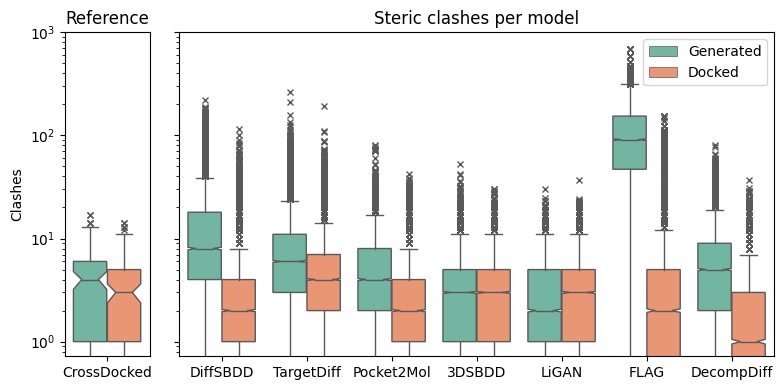

In [18]:
# 2 subplots of diffennt widths
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 4), sharey=True, gridspec_kw={"width_ratios": [1, 7]}
)



# all data minus crossdocked
df = pd.concat(
    [
        diffsbdd_generated_clashes,
        diffsbdd_docked_clashes,
        targetdiff_generated_clashes,
        targetdiff_docked_clashes,
        p2m_generated_clashes,
        p2m_docked_clashes,
        sbdd_generated_clashes,
        sbdd_docked_clashes,
        cvae_generated_clashes,
        cvae_docked_clashes,
        
        flag_generated_clashes,
        flag_docked_clashes,
        decompdiff_generated_clashes,
        decompdiff_docked_clashes,
    ]
)

crossdocked_df = pd.concat([crossdocked_generated_clashes, crossdocked_docked_clashes])

# Plot 1 with just crossdocked
sns.boxplot(
    data=crossdocked_df,
    x="method",
    y="clashes",
    linewidth=1,
    ax=ax1,
    notch=True,
    hue="docked",
    palette="Set2",
    flierprops={"marker": "x"},
)  # color=sns.color_palette("Set2", 8)[1])
ax1.set_xlabel(""), ax1.set_ylabel("Clashes"), ax1.set_title("Reference")
ax1.legend().remove()


sns.boxplot(
    data=df,
    x="method",
    y="clashes",
    hue="docked",
    palette="Set2",
    linewidth=1,
    flierprops={"marker": "x"},
    # boxprops={"facecolor": (.4, .6, .8, .5)},
    # medianprops={"color": "coral"},
    # split=True,
    fliersize=5,
    notch=True,
    ax=ax2,
)


# scale aymslog
plt.yscale("log")
plt.ylim(0, 1000)
plt.xlabel(""), plt.legend(loc="upper right"), plt.title(
    "Steric clashes per model"
), plt.ylabel(""), plt.tight_layout()
# Set figure title
# fig.suptitle("Steric clashes per model", fontsize=16, y=1.05, x=0.6)
plt.savefig("figures/clashes.svg", bbox_inches="tight")

## Per target

In [10]:
df[df["method"] == method]

NameError: name 'method' is not defined

In [ ]:
# sort target alphabetically
order = crossdocked_df[crossdocked_df["docked"] == "Generated"]['target'].unique().tolist()
order.sort()
order
    

/tmp/ipykernel_50243/2880670368.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_xticklabels(axs[-1].get_xticklabels(), rotation=90)


Text(0.5, 0, 'Target')

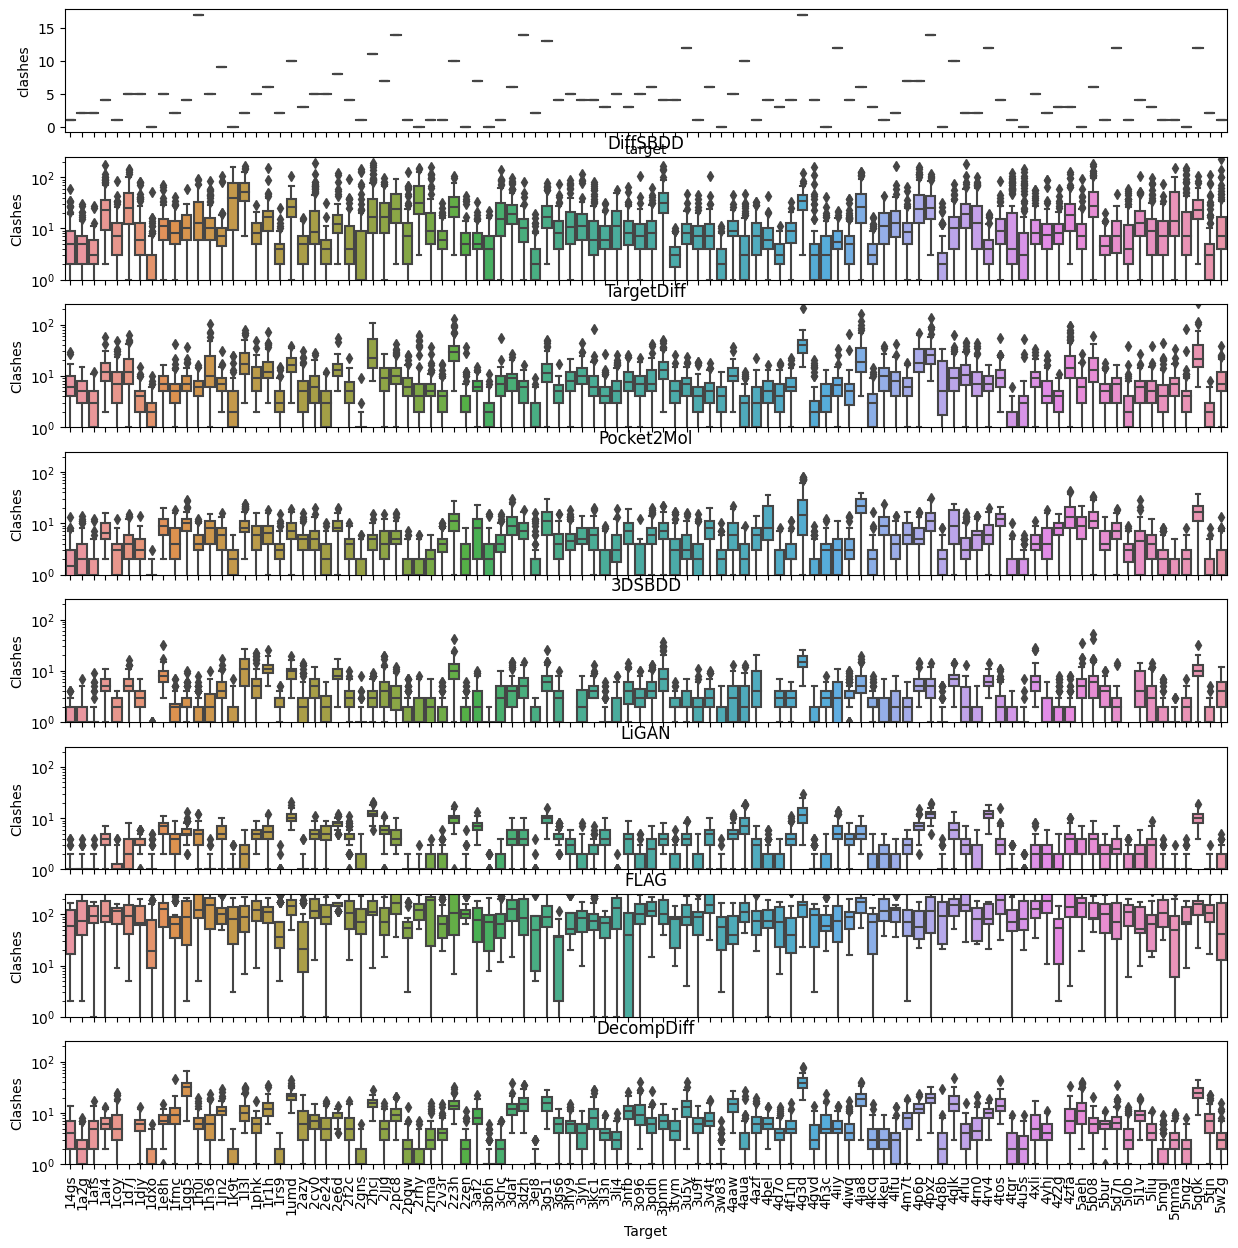

In [34]:
# plot clashes per model per target

fig, axs = plt.subplots(8, 1, figsize=(15, 15), sharex=True)

# get order of targets by median clashes for DiffSBDD
# order = df[df['method'] == 'DiffSBDD'].groupby('target').median().sort_values(by='clashes').index

# order from crossdocked
order = crossdocked_df[crossdocked_df["docked"] == "Generated"]['target'].unique().tolist()
order.sort()

df["target"] = pd.Categorical(df["target"], order)
crossdocked_df["target"] = pd.Categorical(crossdocked_df["target"], order)

axs[-1].set_xticklabels(axs[-1].get_xticklabels(), rotation=90)

# crossdocked
sns.boxplot(
    data=crossdocked_df[crossdocked_df["docked"] == "Generated"],
    x="target",
    y="clashes",
    ax=axs[0],
)

for i, method in enumerate(["DiffSBDD", "TargetDiff", "Pocket2Mol", "3DSBDD", "LiGAN", "FLAG", "DecompDiff"]):
    # plot generated clashses
    sns.boxplot(data=df[(df["method"] == method) & (df["docked"] == "Generated")], x="target", y="clashes", ax=axs[i + 1])

    axs[i+1].set_yscale("log")
    axs[i+1].set_ylim(1, 250)
    axs[i+1].set_xlabel(""), axs[i+1].set_ylabel("Clashes"), axs[i+1].set_title(method)


axs[-1].set_xlabel("Target")

## Get bad and good mols

In [13]:
# idx 0 for diffsbdd
df_0 = df.loc[0]
df_0.reset_index(inplace=True)

# get diffsbdd clashes
diffsbdd_clashes = df_0[df_0["method"] == "DiffSBDD"]
diffsbdd_clashes

,index,mol,clashes,target,method,docked
2,0,<rdkit.Chem.rdchem.Mol object at 0x187ca8e50>,62.0,2z3h,DiffSBDD,Generated
3,0,<rdkit.Chem.rdchem.Mol object at 0x17a652430>,4.0,2z3h,DiffSBDD,Docked


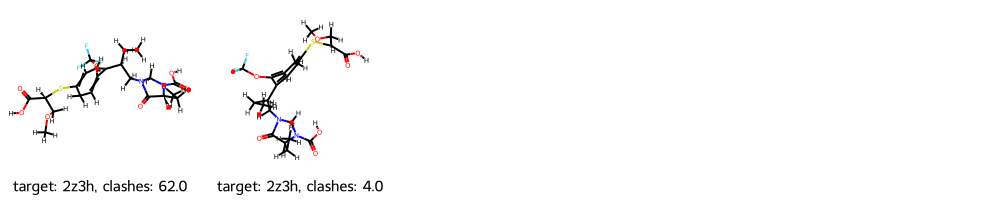

In [15]:
Chem.Draw.MolsToGridImage(
    diffsbdd_clashes.mol.to_list(),
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[
        f"target: {target}, clashes: {clashes}"
        for target, clashes in zip(diffsbdd_clashes.target, diffsbdd_clashes.clashes)
    ],
)

In [16]:
dm.to_sdf(diffsbdd_clashes.mol.to_list(), "diffsbdd_clashes_2z3h_62_to_4.sdf")

In [6]:
# get worse targetdiff examples
worst = (
    df[(df["method"] == "TargetDiff")]
    .sort_values(by="clashes", ascending=False)
    .head(10)
)
worst

,mol,clashes,target,method,docked
2073,<rdkit.Chem.rdchem.Mol object at 0x187ad84a0>,264.0,5q0k,TargetDiff,Generated
1534,<rdkit.Chem.rdchem.Mol object at 0x188250270>,211.0,4g3d,TargetDiff,Generated
1990,<rdkit.Chem.rdchem.Mol object at 0x188407290>,195.0,5q0k,TargetDiff,Docked
4474,<rdkit.Chem.rdchem.Mol object at 0x186e2bc90>,159.0,4ja8,TargetDiff,Generated
5422,<rdkit.Chem.rdchem.Mol object at 0x1872f1620>,134.0,4pxz,TargetDiff,Generated
11,<rdkit.Chem.rdchem.Mol object at 0x187f2a2f0>,126.0,2z3h,TargetDiff,Generated
4451,<rdkit.Chem.rdchem.Mol object at 0x186e2b1a0>,120.0,4ja8,TargetDiff,Generated
1994,<rdkit.Chem.rdchem.Mol object at 0x186b9a840>,114.0,5q0k,TargetDiff,Generated
4278,<rdkit.Chem.rdchem.Mol object at 0x186c2b6a0>,110.0,4ja8,TargetDiff,Docked
1916,<rdkit.Chem.rdchem.Mol object at 0x1884046d0>,107.0,5q0k,TargetDiff,Docked


5q0k


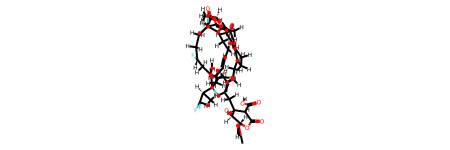

In [75]:
# get mol and print target
mol = worst.iloc[0]["mol"]
print(worst.iloc[0]["target"])
mol

In [76]:
dm.to_sdf(mol, "worst_targetdiff_5q0k_264_clashes.sdf")

In [77]:
# TargetDiff best
best = (
    df[(df["method"] == "TargetDiff")]
    .sort_values(by="clashes", ascending=True)
    .head(10)
)

,mol,clashes,target,method,docked
3692,<rdkit.Chem.rdchem.Mol object at 0x1893d5d00>,0.0,4iwq,TargetDiff,Docked
6683,<rdkit.Chem.rdchem.Mol object at 0x189abd490>,0.0,3l3n,TargetDiff,Docked
6681,<rdkit.Chem.rdchem.Mol object at 0x189abe250>,0.0,3l3n,TargetDiff,Docked
3991,<rdkit.Chem.rdchem.Mol object at 0x18cabde40>,0.0,5ngz,TargetDiff,Generated
3527,<rdkit.Chem.rdchem.Mol object at 0x18cab5e40>,0.0,4tqr,TargetDiff,Generated
1597,<rdkit.Chem.rdchem.Mol object at 0x18815e200>,0.0,3gs6,TargetDiff,Docked
747,<rdkit.Chem.rdchem.Mol object at 0x18cac9ad0>,0.0,1a2g,TargetDiff,Generated
6675,<rdkit.Chem.rdchem.Mol object at 0x189abd260>,0.0,3l3n,TargetDiff,Docked
6673,<rdkit.Chem.rdchem.Mol object at 0x189abea20>,0.0,3l3n,TargetDiff,Docked
6669,<rdkit.Chem.rdchem.Mol object at 0x189abde90>,0.0,3l3n,TargetDiff,Docked


In [79]:
best = (
    df[(df["method"] == "TargetDiff") & (df["target"] == "5q0k")]
    .sort_values(by="clashes", ascending=True)
    .head(10)
)

In [80]:
dm.to_sdf(best.iloc[0]["mol"], "best_targetdiff_5q0k_2_clashes.sdf")

In [82]:
targetdiff_generated_df = df[
    (df["method"] == "TargetDiff") & (df["docked"] == "Generated")
]

/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


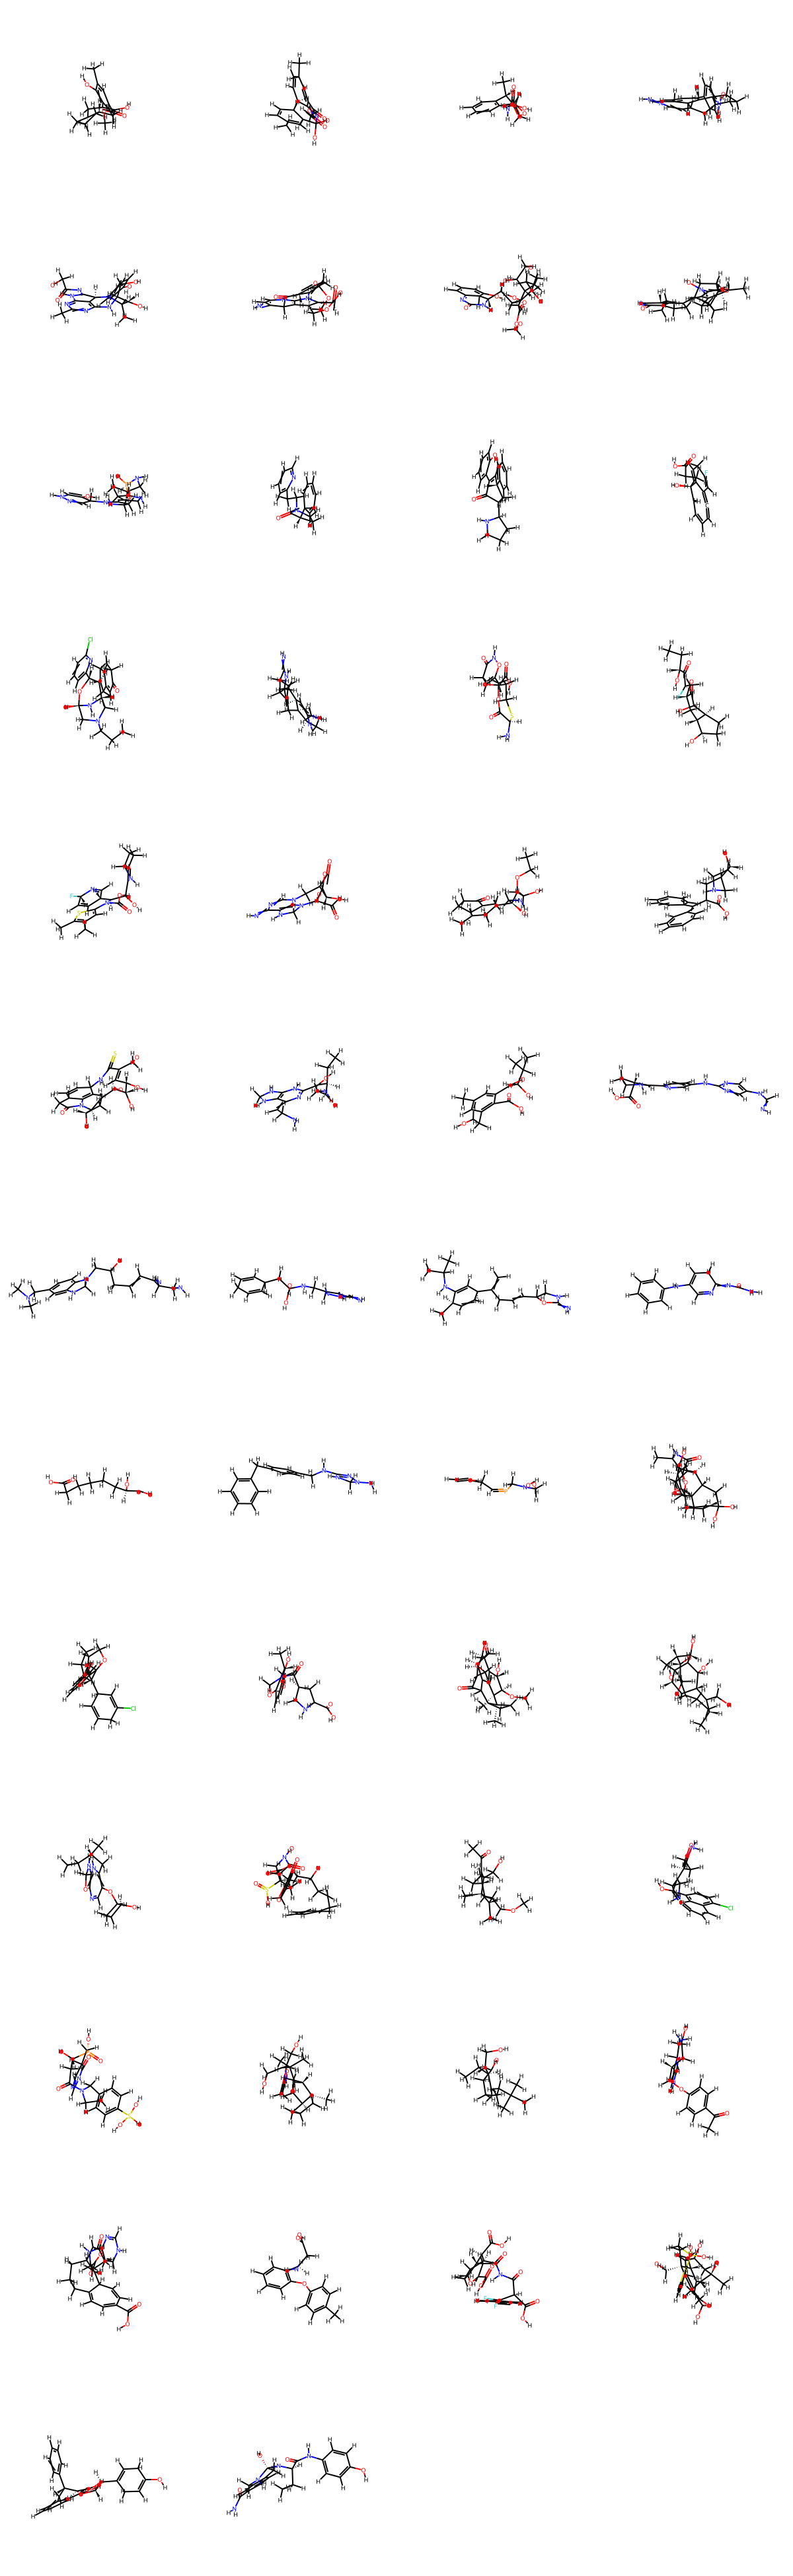

In [87]:
# get samples with 6 clashes
clashes_6 = targetdiff_generated_df[targetdiff_generated_df["clashes"] == 6]

# vis
Chem.Draw.MolsToGridImage(
    clashes_6["mol"].apply(lambda x: Chem.AddHs(x)), molsPerRow=4, subImgSize=(300, 300)
)

In [84]:
targetdiff_generated_df.describe()

,clashes
count,9036.000000
mean,9.033533
std,11.296178
min,0.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,264.000000
